In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data=pd.read_csv('./all_output_train.csv',skiprows=[1], parse_dates=['TIMESTAMP'])

In [3]:
train_data.info()
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75974 entries, 0 to 75973
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   TIMESTAMP            75974 non-null  datetime64[ns]
 1   Duration             75974 non-null  float64       
 2   11_LEFT_SHOULDER_X   75974 non-null  float64       
 3   11_LEFT_SHOULDER_Y   75974 non-null  float64       
 4   12_RIGHT_SHOULDER_X  75974 non-null  float64       
 5   12_RIGHT_SHOULDER_Y  75974 non-null  float64       
 6   13_LEFT_ELBOW_X      75974 non-null  float64       
 7   13_LEFT_ELBOW_Y      75974 non-null  float64       
 8   14_RIGHT_ELBOW_X     75974 non-null  float64       
 9   14_RIGHT_ELBOW_Y     75974 non-null  float64       
 10  15_LEFT_WRIST_X      75974 non-null  float64       
 11  15_LEFT_WRIST_Y      75974 non-null  float64       
 12  16_RIGHT_WRIST_X     75974 non-null  float64       
 13  16_RIGHT_WRIST_Y     75974 non-

,TIMESTAMP,Duration,11_LEFT_SHOULDER_X,11_LEFT_SHOULDER_Y,12_RIGHT_SHOULDER_X,12_RIGHT_SHOULDER_Y,13_LEFT_ELBOW_X,13_LEFT_ELBOW_Y,14_RIGHT_ELBOW_X,14_RIGHT_ELBOW_Y,...,24_RIGHT_HIP_Y,25_LEFT_KNEE_X,25_LEFT_KNEE_Y,26_RIGHT_KNEE_X,26_RIGHT_KNEE_Y,27_LEFT_ANKLE_X,27_LEFT_ANKLE_Y,28_RIGHT_ANKLE_X,28_RIGHT_ANKLE_Y,Event
0,2022-01-13 22:56:44,0.121019,17.982848,105.955818,22.742105,108.759999,20.768878,136.223145,27.541373,144.229932,...,166.032171,25.449066,205.000749,49.077978,192.237983,29.454775,243.545322,68.554640,222.785325,0
1,2022-01-13 22:56:44,0.127389,18.414494,105.030692,27.124822,108.759584,21.051083,134.426007,30.842733,143.719153,...,165.501122,25.312543,205.234995,51.763725,191.659255,26.008887,243.505526,72.259979,220.386157,0
2,2022-01-13 22:56:44,0.133758,18.833616,104.734576,32.043087,107.252648,21.099596,134.623504,35.660386,142.303820,...,164.071798,23.925748,205.172896,55.737596,190.146031,18.964665,246.937666,73.974938,219.455123,0
3,2022-01-13 22:56:44,0.140127,19.838880,103.597283,36.954868,105.873485,20.927110,131.411290,39.819145,140.188279,...,161.115561,24.405763,200.973516,58.017778,188.359480,18.548771,245.929413,74.907966,219.671144,0
4,2022-01-13 22:56:44,0.146497,22.819440,102.201905,42.224021,104.539282,23.665075,127.957935,42.974157,138.406777,...,159.999633,26.686420,197.467675,60.853300,187.165518,17.191280,245.703678,75.237198,219.403224,0


In [4]:
validation_data=pd.read_csv('./test_3_my_joined.csv',skiprows=[1], parse_dates=['TIMESTAMP'])
validation_data_1=pd.read_csv('./test_1_multiple_falls_joined.csv',skiprows=[1],parse_dates=['TIMESTAMP'])
validation_data_2=pd.read_csv('./test_2_single_joined.csv',skiprows=[1],parse_dates=['TIMESTAMP'])

In [5]:
validation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21203 entries, 0 to 21202
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   TIMESTAMP            21203 non-null  datetime64[ns]
 1   Duration             21203 non-null  float64       
 2   11_LEFT_SHOULDER_X   21203 non-null  float64       
 3   11_LEFT_SHOULDER_Y   21203 non-null  float64       
 4   12_RIGHT_SHOULDER_X  21203 non-null  float64       
 5   12_RIGHT_SHOULDER_Y  21203 non-null  float64       
 6   13_LEFT_ELBOW_X      21203 non-null  float64       
 7   13_LEFT_ELBOW_Y      21203 non-null  float64       
 8   14_RIGHT_ELBOW_X     21203 non-null  float64       
 9   14_RIGHT_ELBOW_Y     21203 non-null  float64       
 10  15_LEFT_WRIST_X      21203 non-null  float64       
 11  15_LEFT_WRIST_Y      21203 non-null  float64       
 12  16_RIGHT_WRIST_X     21203 non-null  float64       
 13  16_RIGHT_WRIST_Y     21203 non-

In [6]:
train_data['day']=train_data['TIMESTAMP'].dt.day
train_data['hour']=train_data['TIMESTAMP'].dt.hour
train_data['minute']=train_data['TIMESTAMP'].dt.minute
train_data['second']=train_data['TIMESTAMP'].dt.second
# Insert the new columns as the second, third, fourth, and fifth columns
train_data.insert(1, 'day', train_data.pop('day'))
train_data.insert(2, 'hour', train_data.pop('hour'))
train_data.insert(3, 'minute', train_data.pop('minute'))
train_data.insert(4, 'second', train_data.pop('second'))

In [7]:
train_data

,TIMESTAMP,day,hour,minute,second,Duration,11_LEFT_SHOULDER_X,11_LEFT_SHOULDER_Y,12_RIGHT_SHOULDER_X,12_RIGHT_SHOULDER_Y,...,24_RIGHT_HIP_Y,25_LEFT_KNEE_X,25_LEFT_KNEE_Y,26_RIGHT_KNEE_X,26_RIGHT_KNEE_Y,27_LEFT_ANKLE_X,27_LEFT_ANKLE_Y,28_RIGHT_ANKLE_X,28_RIGHT_ANKLE_Y,Event
0,2022-01-13 22:56:44,13,22,56,44,0.121019,17.982848,105.955818,22.742105,108.759999,...,166.032171,25.449066,205.000749,49.077978,192.237983,29.454775,243.545322,68.554640,222.785325,0
1,2022-01-13 22:56:44,13,22,56,44,0.127389,18.414494,105.030692,27.124822,108.759584,...,165.501122,25.312543,205.234995,51.763725,191.659255,26.008887,243.505526,72.259979,220.386157,0
2,2022-01-13 22:56:44,13,22,56,44,0.133758,18.833616,104.734576,32.043087,107.252648,...,164.071798,23.925748,205.172896,55.737596,190.146031,18.964665,246.937666,73.974938,219.455123,0
3,2022-01-13 22:56:44,13,22,56,44,0.140127,19.838880,103.597283,36.954868,105.873485,...,161.115561,24.405763,200.973516,58.017778,188.359480,18.548771,245.929413,74.907966,219.671144,0
4,2022-01-13 22:56:44,13,22,56,44,0.146497,22.819440,102.201905,42.224021,104.539282,...,159.999633,26.686420,197.467675,60.853300,187.165518,17.191280,245.703678,75.237198,219.403224,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75969,2022-12-01 02:56:51,1,2,56,51,0.987179,84.701157,61.457820,69.493804,63.369613,...,87.457716,91.005630,102.009773,85.820160,90.499148,91.580648,118.326502,93.386049,106.707923,0
75970,2022-12-01 02:56:51,1,2,56,51,0.990385,84.700947,61.398747,69.515700,63.363047,...,87.303793,90.758610,102.117791,84.581957,89.625685,91.605263,118.333619,93.486710,106.622930,0
75971,2022-12-01 02:56:51,1,2,56,51,0.993590,84.707241,61.377161,69.518890,63.364298,...,87.304981,90.776167,101.909022,84.854021,89.636321,91.686897,118.352244,93.577003,106.629016,0
75972,2022-12-01 02:56:51,1,2,56,51,0.996795,84.700136,61.367404,69.544015,63.358090,...,87.299209,90.781879,101.593366,86.734409,89.883127,91.691904,118.248518,94.084892,106.302845,0


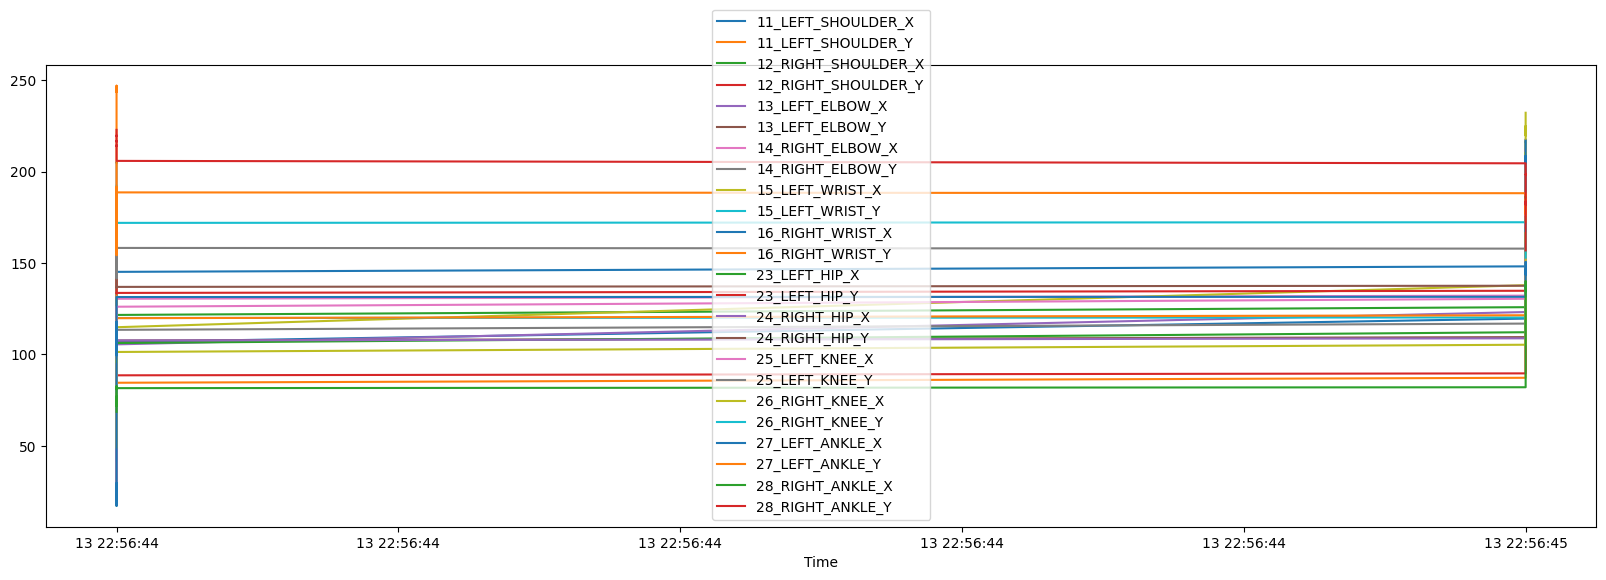

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# Load data into a DataFrame
df = train_data.iloc[:50, :]

# Plot all features and event on a single graph
fig, ax = plt.subplots(figsize=(20, 6))

for col in df.columns[6:]:  # Exclude TIMESTAMP column
    if col == "Event":
        # Mark continuous series of 1 in red
        start = None
        end = None
        for j, event in enumerate(df["Event"]):
            if event == 1 and start is None:
                start = df.loc[j, "TIMESTAMP"]
            elif event == 0 and start is not None:
                end = df.loc[j - 1, "TIMESTAMP"]
                ax.axvspan(start, end, alpha=0.2, color='red')
                start = None
                end = None
    else:
        ax.plot(df["TIMESTAMP"], df[col], label=col, linestyle="-")  # Use "-" linestyle for curves

# Set x-axis label and tick format
ax.set_xlabel("Time")
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%d %H:%M:%S"))

# Set legend and show the plot
ax.legend()
plt.show()


In [9]:
from sklearn.preprocessing import Normalizer
import pandas as pd

# Load data into a pandas dataframe
df = train_data

# Get the columns to normalize
cols_to_normalize = [col for col in df.columns if col not in ['TIMESTAMP', 'Duration', 'Event']]

# Apply L2 normalization to the selected columns
transformer = Normalizer(norm='l2')
df[cols_to_normalize] = transformer.fit_transform(df[cols_to_normalize])


In [10]:
data=np.asarray(df)

In [11]:
from xgboost import XGBClassifier
# read data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from collections import Counter
smt=SMOTE()

X_train, X_test, y_train, y_test = train_test_split(data[:,1:25],data[:,-1], test_size=.2)

y_train=y_train.astype('int32')

X_train,y_train=smt.fit_resample(X_train,y_train)
y_test=y_test.astype('int32')
X_test,y_test=smt.fit_resample(X_test,y_test)







# create model instance
pipeline= Pipeline([('scaler', StandardScaler()),( 'xgbclassifier',XGBClassifier(n_estimators=200, max_depth=5, learning_rate=1.3, objective='binary:logistic'))])
# fit model
pipeline.fit(X_train, y_train)
# make predictions
preds = pipeline.predict(X_test)
y_test=np.asarray(y_test)
y_test=y_test.astype(np.int32)

print("Test")
print(classification_report(y_test, preds,zero_division=1))

Test
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     14196
           1       0.99      0.97      0.98     14196

    accuracy                           0.98     28392
   macro avg       0.98      0.98      0.98     28392
weighted avg       0.98      0.98      0.98     28392



In [12]:
from sklearn.metrics import confusion_matrix
CM= confusion_matrix(y_test,preds)
CM.shape

(2, 2)

In [13]:
specificity=CM[0,0]/(CM[0,0]+CM[0,1])
print(f"specificity:{specificity}")

specificity:0.9940123978585517


In [14]:
sensitivity=CM[1,1]/(CM[1,0]+CM[1,1])
print(f"sensitivity:{sensitivity}")

sensitivity:0.9660467737390814


Text(0.5, 427.9555555555555, 'Predicted ')

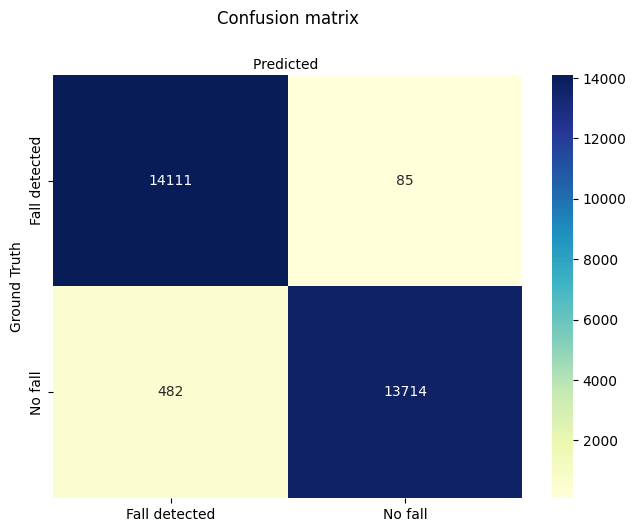

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
CM_labels=[
   
    'Fall detected',
    'No fall'
    
]
class_names=[
    'Fall detected',
    'No fall'
] 
CM_array_df = pd.DataFrame(CM, index= CM_labels,columns= CM_labels)
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(CM_array_df), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Ground Truth')
plt.xlabel('Predicted ')

In [16]:
def normalizer_(dataframe_:pd.DataFrame)->pd.DataFrame:
    from sklearn.preprocessing import Normalizer
    import pandas as pd

    # Load data into a pandas dataframe
    vdf = dataframe_

    # Get the columns to normalize
    cols_to_normalize = [col for col in vdf.columns if col not in ['TIMESTAMP', 'Duration', 'Event']]

    # Apply L2 normalization to the selected columns
    transformer = Normalizer(norm='l2')
    vdf[cols_to_normalize] = transformer.fit_transform(vdf[cols_to_normalize])
    return vdf

In [18]:
vdata_1=normalizer_(validation_data)
vdata_2=normalizer_(validation_data_1)
vdata_3=normalizer_(validation_data_2)
vdata_1=np.asarray(vdata_1)
vdata_2=np.asarray(vdata_2)
vdata_3=np.asarray(vdata_3)

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
validation_preds_1 = pipeline.predict(vdata_1[:,1:25])
validation_preds_2 = pipeline.predict(vdata_2[:,1:25])
validation_preds_3 = pipeline.predict(vdata_3[:,1:25])
y_test_v1=np.asarray(vdata_1[:,-1])
y_test_v2=np.asarray(vdata_2[:,-1])
y_test_v3=np.asarray(vdata_3[:,-1])
y_test_v1=y_test_v1.astype(np.int32)
y_test_v2=y_test_v2.astype(np.int32)
y_test_v3=y_test_v3.astype(np.int32)

print("Validation-1:")
print(classification_report(y_test_v1, validation_preds_1,zero_division=1))
print("Validation-2:")
print(classification_report(y_test_v2, validation_preds_2,zero_division=1))
print("Validation-3:")
print(classification_report(y_test_v3, validation_preds_3,zero_division=1))

Validation-1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21203
           1       0.00      1.00      0.00         0

    accuracy                           1.00     21203
   macro avg       0.50      1.00      0.50     21203
weighted avg       1.00      1.00      1.00     21203

Validation-2:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    156698
           1       0.00      1.00      0.00         0

    accuracy                           1.00    156698
   macro avg       0.50      1.00      0.50    156698
weighted avg       1.00      1.00      1.00    156698

Validation-3:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56340
           1       0.00      1.00      0.00         0

    accuracy                           1.00     56340
   macro avg       0.50      1.00      0.50     56340
weighted avg       1.00      1.0

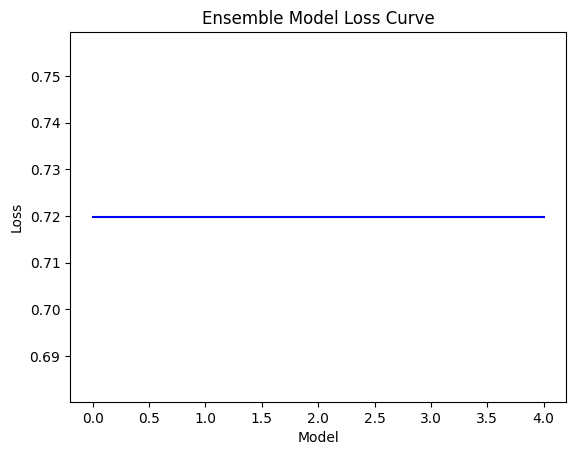

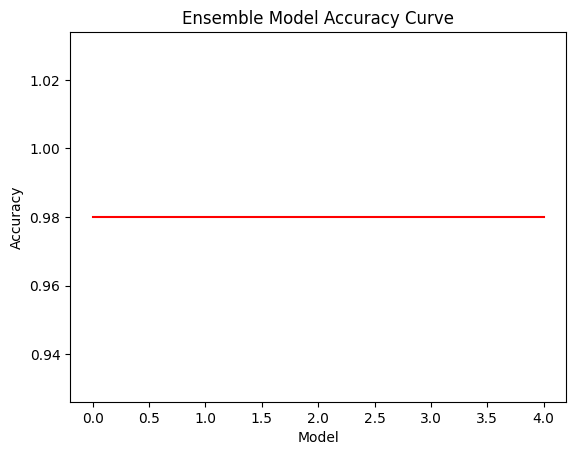

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, log_loss
# Initialize a list to store the individual model predictions
ensemble_predictions = []

# Initialize lists to store the loss and accuracy values
loss_values = []
accuracy_values = []

# Specify the number of ensemble models
num_models = 5

# Train the ensemble models
for i in range(num_models):
    ensemble_predictions.append(preds)
    
    # Calculate the loss (log loss) and accuracy for the current model
    loss = log_loss(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    
    # Store the loss and accuracy values
    loss_values.append(loss)
    accuracy_values.append(accuracy)

# Plot the loss curve
plt.figure()
plt.plot(range(num_models), loss_values, 'b-')
plt.xlabel('Model')
plt.ylabel('Loss')
plt.title('Ensemble Model Loss Curve')
plt.show()

# Plot the accuracy curve
plt.figure()
plt.plot(range(num_models), accuracy_values, 'r-')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Ensemble Model Accuracy Curve')
plt.show()





In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report

pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', RandomForestClassifier(n_estimators=200, max_depth=5))])
y_train = y_train.astype('int')
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=5, n_estimators=200))])

In [23]:
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.78      0.86     14196
           1       0.81      0.97      0.88     14196

    accuracy                           0.87     28392
   macro avg       0.88      0.87      0.87     28392
weighted avg       0.88      0.87      0.87     28392



In [24]:
cm= confusion_matrix(y_test,y_pred)
cm.shape

(2, 2)

In [25]:
specificity=cm[0,0]/(cm[0,0]+cm[0,1])
print(f"specificity:{specificity}")

specificity:0.7751479289940828


In [26]:
sensitivity=cm[1,1]/(cm[1,0]+cm[1,1])
print(f"sensitivity:{sensitivity}")

sensitivity:0.9658354466046774


In [27]:
cm_labels=[
    'Fall detected',
    'No fall'
  
    
]
cm_array_df = pd.DataFrame(cm, index=cm_labels,columns=cm_labels)

Text(0.5, 427.9555555555555, 'Predicted ')

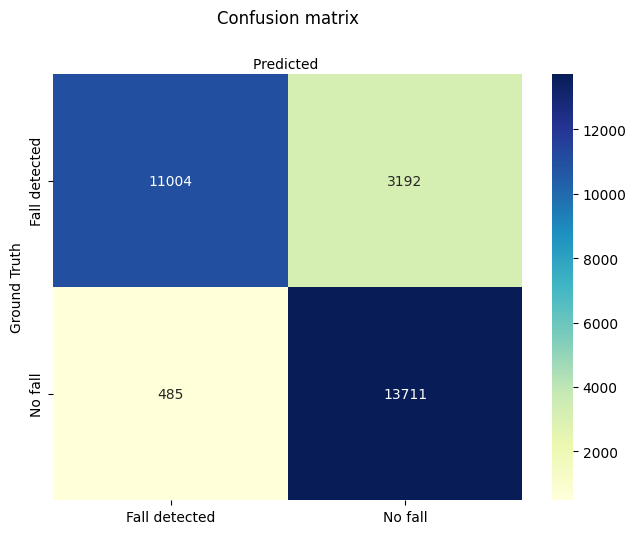

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[
    'Fall detected',
    'No fall'
  
    
] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_array_df), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Ground Truth')
plt.xlabel('Predicted ')

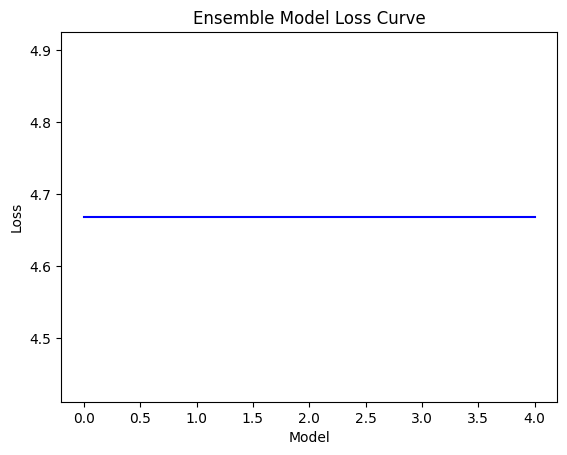

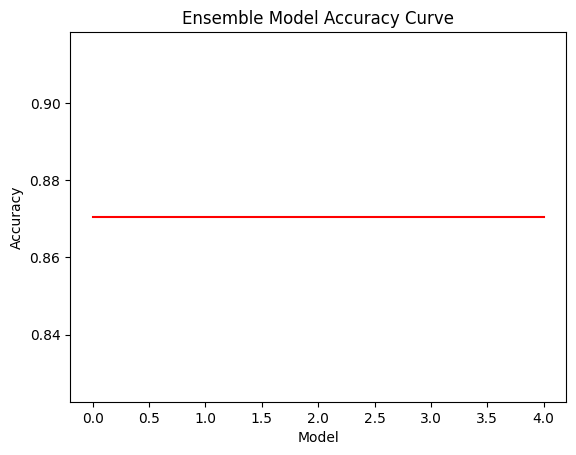

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, log_loss
# Initialize a list to store the individual model predictions
ensemble_predictions = []

# Initialize lists to store the loss and accuracy values
loss_values = []
accuracy_values = []

# Specify the number of ensemble models
num_models = 5

# Train the ensemble models
for i in range(num_models):
    ensemble_predictions.append(y_pred)
    
    # Calculate the loss (log loss) and accuracy for the current model
    loss = log_loss(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the loss and accuracy values
    loss_values.append(loss)
    accuracy_values.append(accuracy)

# Plot the loss curve
plt.figure()
plt.plot(range(num_models), loss_values, 'b-')
plt.xlabel('Model')
plt.ylabel('Loss')
plt.title('Ensemble Model Loss Curve')
plt.show()

# Plot the accuracy curve
plt.figure()
plt.plot(range(num_models), accuracy_values, 'r-')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Ensemble Model Accuracy Curve')
plt.show()





In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report

pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', KNeighborsClassifier(n_neighbors=5))])
y_train = y_train.astype('int')
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99     14196
           1       0.99      0.98      0.99     14196

    accuracy                           0.99     28392
   macro avg       0.99      0.99      0.99     28392
weighted avg       0.99      0.99      0.99     28392



In [32]:
cM= confusion_matrix(y_test,y_pred)
cM.shape

(2, 2)

In [33]:
specificity=cM[0,0]/(cM[0,0]+cM[0,1])
print(f"specificity:{specificity}")

specificity:0.9910538179768948


In [34]:
sensitivity=cM[1,1]/(cM[1,0]+cM[1,1])
print(f"sensitivity:{sensitivity}")

sensitivity:0.9793603832065371


In [35]:
cM_labels=[
    'Fall detected',
    'No fall'
  
    
]
cM_array_df = pd.DataFrame(cM, index=cM_labels,columns=cM_labels)

Text(0.5, 427.9555555555555, 'Predicted ')

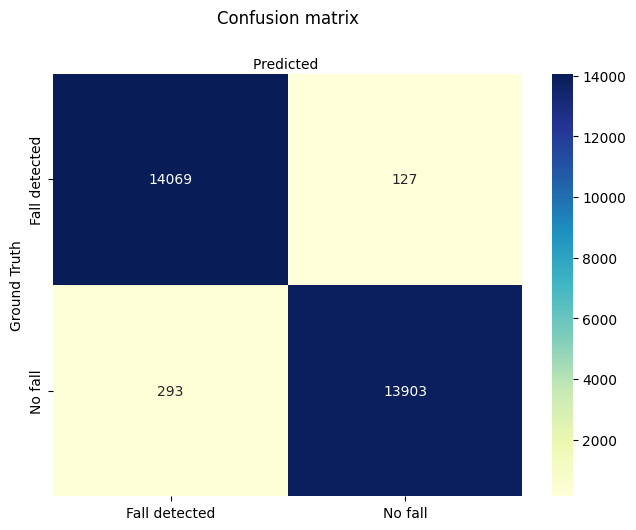

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[
    'Fall detected',
    'No fall'
  
    
] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cM_array_df), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Ground Truth')
plt.xlabel('Predicted ')

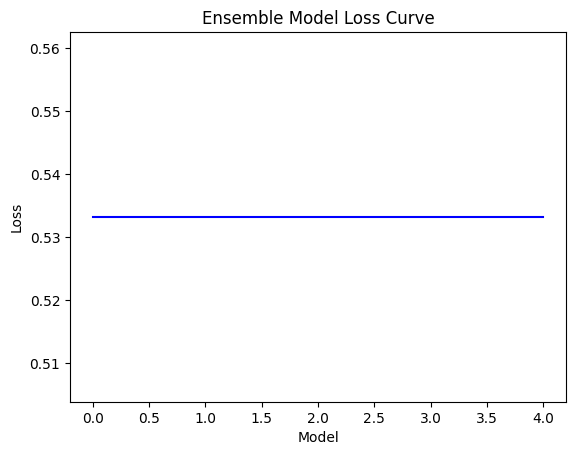

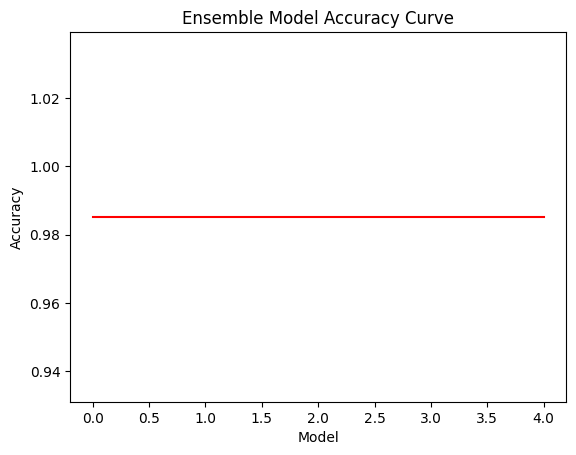

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, log_loss
# Initialize a list to store the individual model predictions
ensemble_predictions = []

# Initialize lists to store the loss and accuracy values
loss_values = []
accuracy_values = []

# Specify the number of ensemble models
num_models = 5

# Train the ensemble models
for i in range(num_models):
    ensemble_predictions.append(y_pred)
    
    # Calculate the loss (log loss) and accuracy for the current model
    loss = log_loss(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the loss and accuracy values
    loss_values.append(loss)
    accuracy_values.append(accuracy)

# Plot the loss curve
plt.figure()
plt.plot(range(num_models), loss_values, 'b-')
plt.xlabel('Model')
plt.ylabel('Loss')
plt.title('Ensemble Model Loss Curve')
plt.show()

# Plot the accuracy curve
plt.figure()
plt.plot(range(num_models), accuracy_values, 'r-')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Ensemble Model Accuracy Curve')
plt.show()





In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report

pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', LogisticRegression())])
y_train = y_train.astype('int')
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.80      0.83     14196
           1       0.81      0.87      0.84     14196

    accuracy                           0.83     28392
   macro avg       0.83      0.83      0.83     28392
weighted avg       0.83      0.83      0.83     28392



c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
Cm1= confusion_matrix(y_test,y_pred)
Cm1.shape

(2, 2)

In [40]:
specificity=Cm1[0,0]/(Cm1[0,0]+Cm1[0,1])
print(f"specificity:{specificity}")

specificity:0.7971259509721048


In [45]:
sensitivity=Cm1[1,1]/(Cm1[1,0]+Cm1[1,1])
print(f"sensitivity:{sensitivity}")

sensitivity:0.8662299239222316


In [42]:
Cm1_labels=[
    'Fall detected',
    'No fall'
  
    
]
Cm1_array_df = pd.DataFrame(Cm1, index=Cm1_labels,columns=Cm1_labels)

Text(0.5, 427.9555555555555, 'Predicted ')

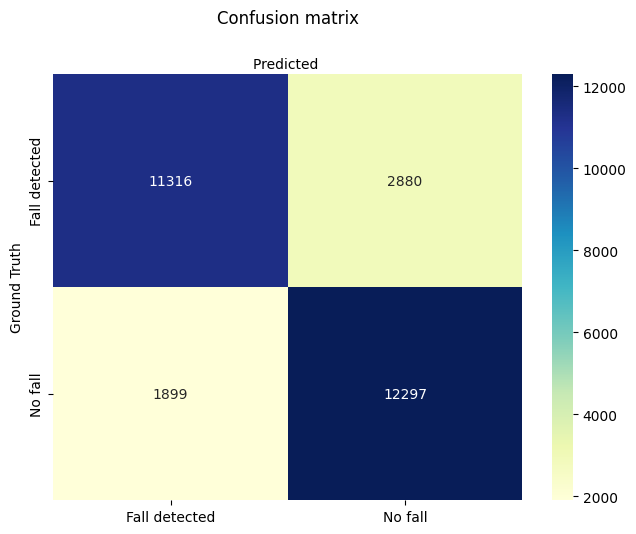

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[
    'Fall detected',
    'No fall'
  
    
] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(Cm1_array_df), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Ground Truth')
plt.xlabel('Predicted ')

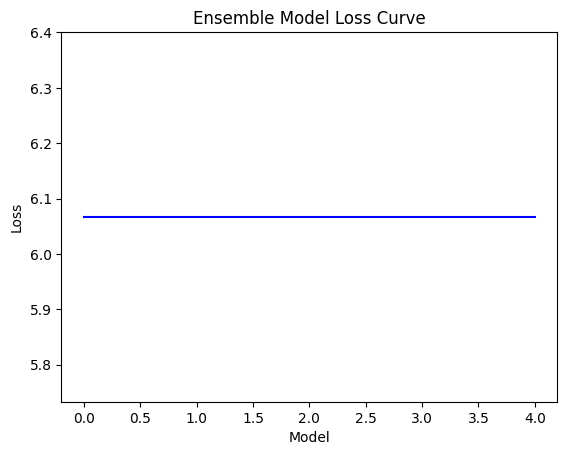

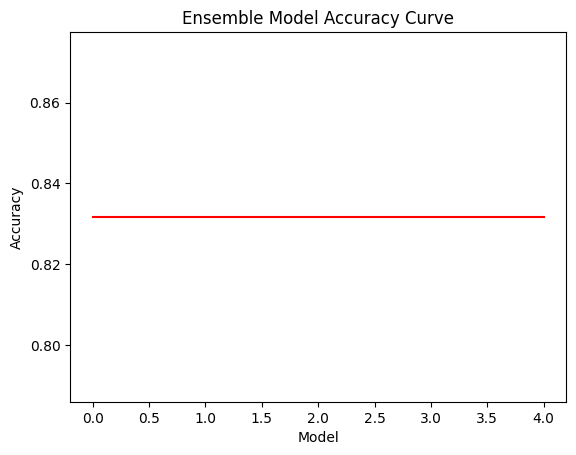

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, log_loss
# Initialize a list to store the individual model predictions
ensemble_predictions = []

# Initialize lists to store the loss and accuracy values
loss_values = []
accuracy_values = []

# Specify the number of ensemble models
num_models = 5

# Train the ensemble models
for i in range(num_models):
    ensemble_predictions.append(y_pred)
    
    # Calculate the loss (log loss) and accuracy for the current model
    loss = log_loss(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the loss and accuracy values
    loss_values.append(loss)
    accuracy_values.append(accuracy)

# Plot the loss curve
plt.figure()
plt.plot(range(num_models), loss_values, 'b-')
plt.xlabel('Model')
plt.ylabel('Loss')
plt.title('Ensemble Model Loss Curve')
plt.show()

# Plot the accuracy curve
plt.figure()
plt.plot(range(num_models), accuracy_values, 'r-')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Ensemble Model Accuracy Curve')
plt.show()


In [47]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report

pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', Perceptron())])
y_train = y_train.astype('int')
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78     14196
           1       0.77      0.82      0.80     14196

    accuracy                           0.79     28392
   macro avg       0.79      0.79      0.79     28392
weighted avg       0.79      0.79      0.79     28392



In [48]:
Cm= confusion_matrix(y_test,y_pred)
Cm.shape

(2, 2)

In [49]:
Cm_labels=[
    'Fall detected',
    'No fall'
  
    
]
Cm_array_df = pd.DataFrame(Cm, index=Cm_labels,columns=Cm_labels)

Text(0.5, 427.9555555555555, 'Predicted ')

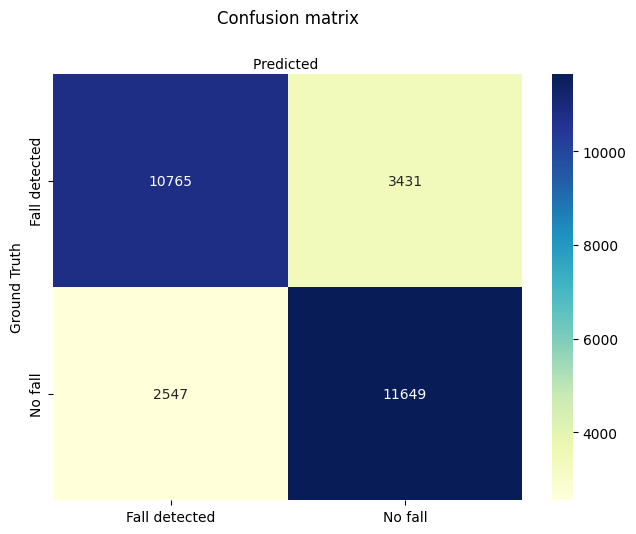

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[
    'Fall detected',
    'No fall'
  
    
] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(Cm_array_df), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Ground Truth')
plt.xlabel('Predicted ')

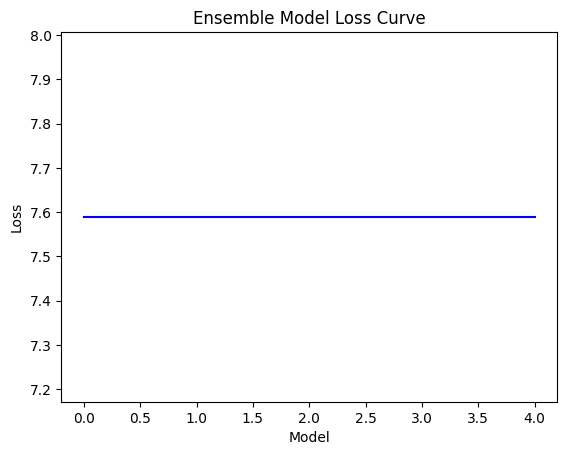

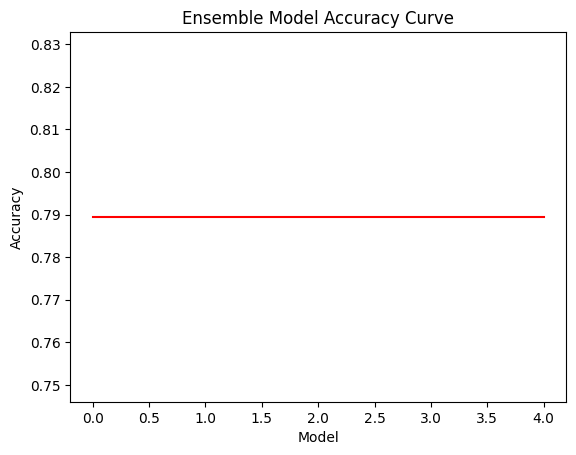

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, log_loss
# Initialize a list to store the individual model predictions
ensemble_predictions = []

# Initialize lists to store the loss and accuracy values
loss_values = []
accuracy_values = []

# Specify the number of ensemble models
num_models = 5

# Train the ensemble models
for i in range(num_models):
    ensemble_predictions.append(y_pred)
    
    # Calculate the loss (log loss) and accuracy for the current model
    loss = log_loss(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the loss and accuracy values
    loss_values.append(loss)
    accuracy_values.append(accuracy)

# Plot the loss curve
plt.figure()
plt.plot(range(num_models), loss_values, 'b-')
plt.xlabel('Model')
plt.ylabel('Loss')
plt.title('Ensemble Model Loss Curve')
plt.show()

# Plot the accuracy curve
plt.figure()
plt.plot(range(num_models), accuracy_values, 'r-')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Ensemble Model Accuracy Curve')
plt.show()
